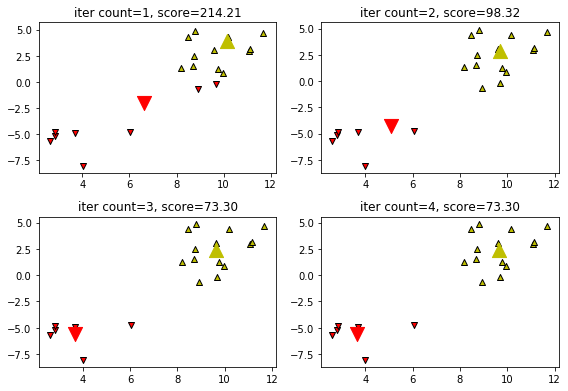

In [3]:
## 군집에 대해 알아보자 
## clustering.pdf참고 

'''
데이터 집합을 유사한 데이터들의 그룹으로 나누는 것 
데이터의 속성(특성)들을 분석하여 비슷한 속성(특성)을 가지는 데이터들끼리 클러스터(군집, 집단)로 묶는 알고리즘
어느 클러스터에도 속하지 못하는 관측 데이터가 존재할 수도 있다
정답이 없는 데이터들의 유사성만을 기준으로 판단합니다.
신용카드 부정 사용 탐지, 구매 패턴 분석 후 소비자 행동 특성을 그룹화하는데 사용

k-평균 군집화
DBSCAN 군집화
유사도 전파 군집화
계층적 군집화
스펙트럴 군집화
군집화 알고리즘들의 사용법과 모수가 서로 다름
군집 분석의 성능 지표 - 조정 랜드지수, 조정 상호정보량, 실루엣 계수
'''
'''
랜드지수(Rand Index , RI)는 데이터가 원래 군집화되어 있는 정답이 필요함
랜드지수는 모든 데이터의 쌍의 개수에 대해 정답인 데이터 쌍의 개수 비율로 정의되므로 0~1사이의 값을 가지며, 1이 가장 좋은 성능을 의미합니다.

무작위 군집화에서 생성되는 랜드지수의 기대값은 크게 나오는 경향이 있기 때문에 랜드지수의 기댓값을 원래 값에서 빼서 기댓값과 분산을 재조정한것을 조정랜드지수(ARI)
'''

'''
# 조정 상호정보량 - 두 확률변수의  상호 의존성을 측정한 값
'''

'''
# 실루엣 계수 - 동일 군집내에 데이터의 거리는 가깝고, 다른 군집의 데이터와의 거리는 멀다는 특성
동일 군집내에 데이터의 거리가 다른 군집의 데이터와의 거리보다 가까우면 양수, 
다른 군집의 데이터와의 거리가 가까우면 음수

'''

'''
# k-평균 군집화
데이터간의 유사성을 기준으로 클러스터 중심까지의 거리를 이용하는 분석방법
데이터 집합에 임의의 k개의 클러스터를 주고 데이터와 클러스터의 중심까지의 거리를 계산하여 가장 가까운 클러스터로 데이터를 할당
(k값에 따라 모델의 성능이 달라집니다.) 

K값이 크면 모델의 정확도가 높아지지만 너무 크면 분석 효과가 작아진다
KMean(n_clusters,, n_init, max_iter, random_state)

가장 단순하면서 빠른 군집화 알고리즘
초기 중심위치에 따라 결과가 달라질 수 있다. 
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=20, random_state=4)
def plot_KMeans(n) :
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ ==0, 0], 
                X[model.labels_==0, 1], 
                marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ ==1, 0], 
                X[model.labels_==1, 1], 
                marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title('iter count={}, score={:5.2f}'.format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()


# 각 점수 및 군집화 결과 열람 가능 

In [4]:
import matplotlib as mpl
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\student\.matplotlib
캐시 위치:  C:\Users\student\.matplotlib


ARI: 0.6703800183468681
AMI: 0.7417664506416767
Silhouette Score: 0.18249069204151275


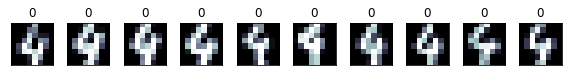

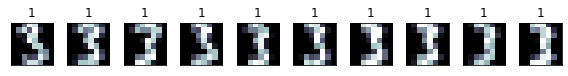

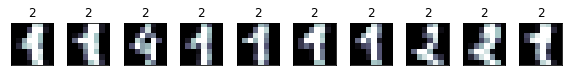

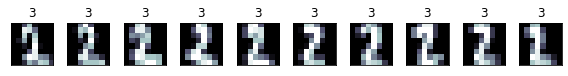

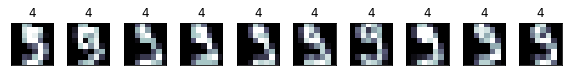

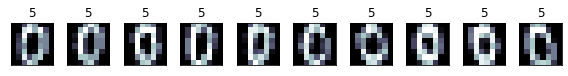

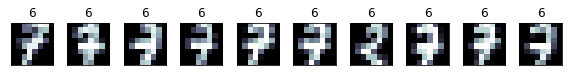

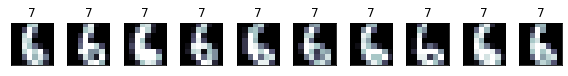

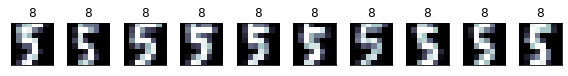

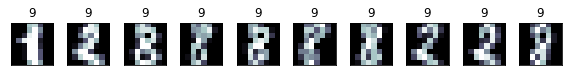

In [6]:
'''
K-means 알고리즘 수행 
1. n차원 공간에서 k개의 중심점을 임의로 선택
2.  중심점에서 각 샘플 데이터까지의 거리 계산
3. 각 데이터 포인트를 가장 가까운 중심점에 할당하여 클러스터 계산
4. 각 중심점에 선택된 데이터 포인트들의 평균 위치로 중심점을 다시 이동
5. 1~4 과정을 수렴할때(중심점의 변화가 거의 없는, 할당된 군집의 변화가 없을때)까지 반복

중심점 centroid 선택 방법 - 랜덤하게 설정, 수동으로 설정, kmean++ 
#k-mean++ 방식을 사용하여 초기 클러스터 중심점을 정하여 군집화 수행 실습

'''
# 정답이 없는 비지도값 

from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)    

for i in range(10):
    show_cluster(digits.images, y_pred, i)


#성능 지표
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)
#군집화 결과의 ARI, AMI, 실루엣계수값 확인
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))



In [16]:
'''
k-means는 중심위치와 모든 데이터 사이의 거리를 계산해야 하므로 
데이터 개수가 많아지면 계산량이 늘어나므로 데이터 수가 많을 때는 
미니배치 k-means 군집화 방법을 사용하면 계산량을 줄일 수 있습니다.
'''
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)


#작업 수행 시간 비교
import time
start = time.time()  # 시작 시간 저장 
model1 = KMeans(n_clusters=3).fit(X)
print("time :", time.time() - start)


#미니배치크기 batch_size 매개변수로 설정 
start = time.time()  # 시작 시간 저장  
model1 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)
print("time :", time.time() - start) #시간이 많이 줄어드는 것을 확인


#과연 결과물은?

time : 0.8514761924743652
time : 0.15790224075317383


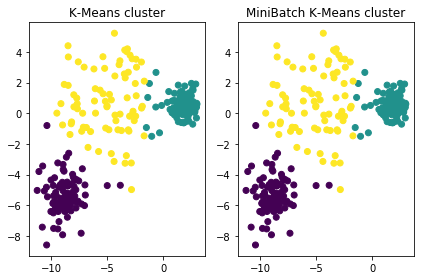

In [17]:
import numpy as np 
idx = np.random.randint(150000, size=300)

plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-Means cluster")

plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("MiniBatch K-Means cluster")

plt.tight_layout()
plt.show()

#결과물의 형태도 거의 유사 (시간↓, 성능=)


In [ ]:
'''연습문제
uci 에서 제공되는 외부데이터를 가지고 K-Means 알고리즘을 처리해보자 
'''

In [41]:
import pandas as pd 
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases//00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
print(df.head())
print(df.info())
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       G

In [42]:
# 분석에 사용할 속성 선택(모든 속성 선택 -비지도학습)
X = df.iloc[:, :]
print(X[:5])

#설명 변수 데이터를 정규화 전처리 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [43]:
# KMeans 군집화(중심점 설정은 k-means++, 중심점개수 5, 초기점 설명수 = 10)
# 군집화된 결과 labels_ 로 확인 

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)   
cluster_label = kmeans.labels_   
print(cluster_label) #군집화 개수를 5로 지정 -> 



[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 3 1 1 0 0 1 1 0 0 3 1 0 0 1 3 1 1 0 3 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 3 3 0 0 0 0 0 3 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 4 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 3 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 1 2
 3 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [44]:
# 예측 결과를 데이터 프레임에 추가 
df['Cluster'] = cluster_label
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        0  
4        5185        1  


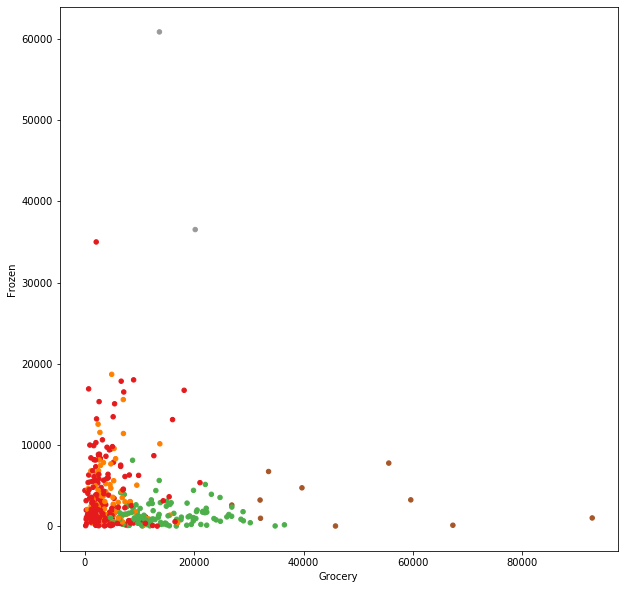

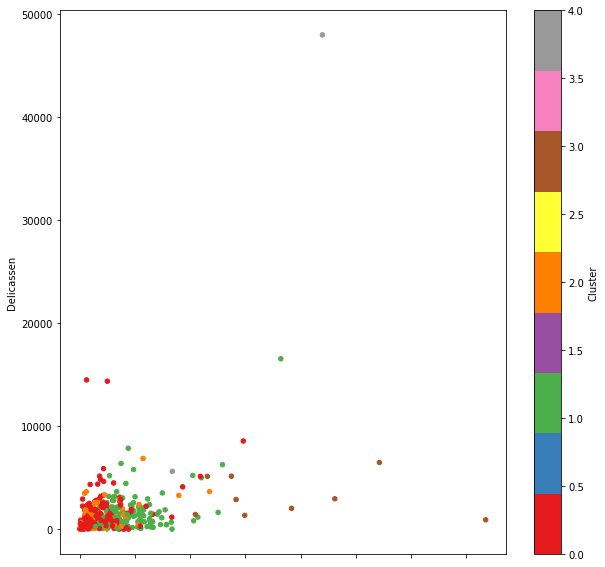

In [45]:

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

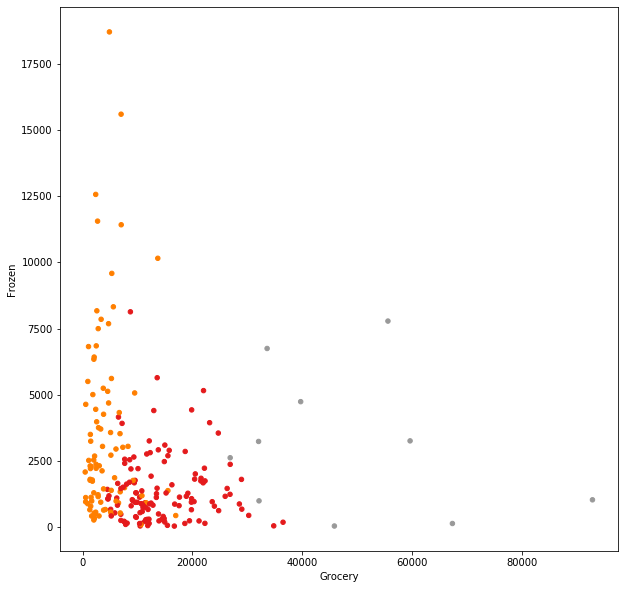

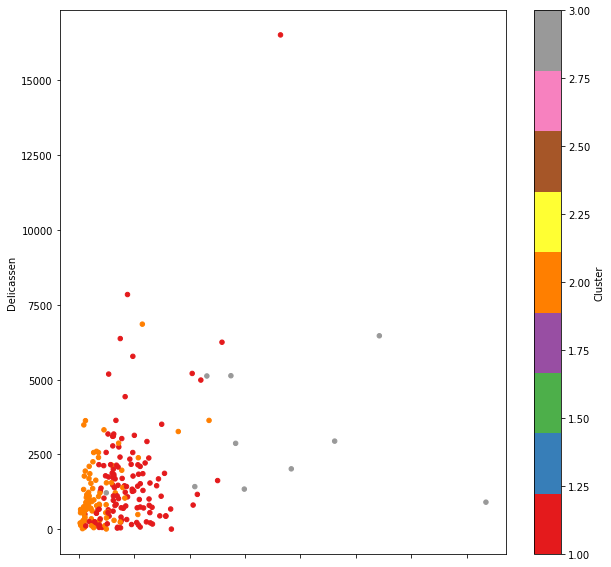

In [46]:
# 값이 몰려있는 구간을 mask를 통해 자세하게 분석 
mask = (df['Cluster']==0) | (df['Cluster']==4)
ndf = df[~mask]
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
         colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
         colorbar=True, figsize=(10,10))
plt.show()
plt.close()


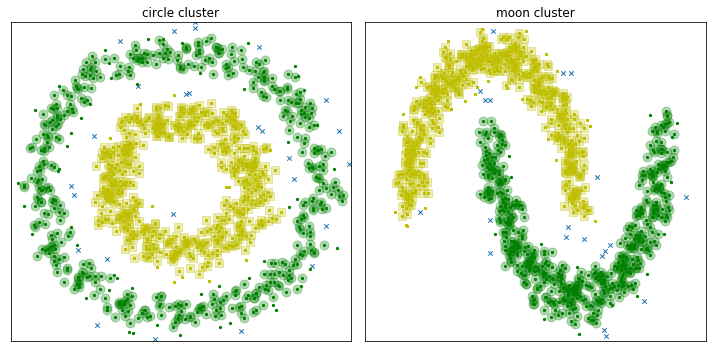

In [48]:
''' DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- 데이터 위치의 공간 밀집도를 기준으로 군집화 

- K-means의 단점 : 단순하고 강력하지만, 군집모양이 원형인 경우에는 잘 동작하나 
                   그렇지 않은 경우에는 잘 동작하지 않음 + 군집 개수를 직접 지정해야 한다. 
- DBSCAN은 데이터 형태에 영향을 받지 않으며, 군집 개수를 직접 지정할 필요가 없습니다. 
- 초기 데이터로부터 근접한 데이터를 찾아 군집을 확장하는 방식 

- 필요 지정 변수
최소 거리( ε,Eps ,앱실론, 코어를 중심으로 한 동심원의 반지름)
최소 데이터 개수(밀집 지역을 정의하기 위한 최소 필요 이웃 개수)
코어 포인트 (핵심데이터): 반지름 R공간에 최소 M개의 포인트가 존재하는 점 
경계포인트 : 반지름 안에 다른 코어 포인터가 있다면 그것은 경계 포인트로 간주 
코어 포인트도 아니고 경계 포인트도 아닌 데이터는 Noise(outlier)로 간주 
'''

'''
- eps매개변수 : 이웃을 정의하기 위한 거리 
- min_samples : 핵심 데이터를 정의하기 위한 최소(필요한) 이웃영역안의 데이터 개수 
- labels_ : 클러스터링 군집 결과에 대한 클래스 번호, -1값 표시시 outlier. 
- core_sample_indices_ : 핵심 데이터의 인덱스 
'''

from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("circle cluster", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("moon cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

In [59]:
#성능 지표 (ARI, AMI) 확인
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("동심원 군집 ARI:", adjusted_rand_score(y1, y_pred1))
print("동심원 군집 AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("초승달 군집 ARI:", adjusted_rand_score(y2, y_pred2))
print("초승달 군집 AMI:", adjusted_mutual_info_score(y2, y_pred2))

동심원 군집 ARI: 0.9414262371038592
동심원 군집 AMI: 0.8967648464619999
초승달 군집 ARI: 0.9544844153926417
초승달 군집 AMI: 0.9151495815452475


In [49]:
## clustering.pdf 실습 
'''
K-평균을 사용한 군집
 샘플을 k 개의 그룹으로 나눌때 k-평균(k-means) 군집을 사용합니다.
 k-평균(k-means) 군집 알고리즘은 샘플을 k개의 그룹으로 나눕니다. 각 그룹은 거의 동일한 분산을 가집니다.
 그룹의 개수 k는 하이퍼파라미터로 사용자가 지정해야 합니다.
 k-평균 동작 방식
1. k개의 클러스터 '중심' 포인트를 랜덤한 위치에 만듭니다.
2. 각 샘플에 대해
a. 각 샘플과 k개의 중심 포인트 사이 거리를 계산합니다.
b. 샘플을 가장 가까운 중심 포인트의 클러스터에 할당합니다.
3. 중심 포인트를 해당하는 클러스터의 평균(중심)으로 이동합니다.
4. 더 이상 샘플의 클러스터 소속이 바뀌지 않을 때까지 단계 2와 단계 3을 반복합니다
 k-평균 군집은 클러스터가 둥그런 모양으로 간주합니다.
 k-평균 군집은 모든 특성은 동일한 스케일을 가정합니다. (가정에 맞도록 특성을 표준화해야 합니다.)
 k-평균 군집은 클러스터 크기는 균형 잡혀 있습니다.
'''

'''
 사이킷런에는 KMeans 클래스에 k-평균 군집이 구현되어 있습니다
 n_clusters 매개변수가 클러스터 k의 수를 지정합니다.
 labels_ 속성에서 각 샘플의 예측 클래스를 확인할 수 있습니다.
'''
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris() # 데이터 로드
features = iris.data

scaler = StandardScaler() # 특성 표준화
features_std = scaler.fit_transform(features)

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1) # k-평균 객체 생성
model = cluster.fit(features_std) # 모델 훈련
model.labels_ # 예측 클래스 확인
iris.target # 진짜 클래스 확인

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
new_observation = [[0.8, 0.8, 0.8, 0.8]] #New Sample Data
print(model.predict(new_observation)) # 샘플의 클러스터를 예측
print(model.cluster_centers_)

[0]
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


139.82049635974982
-139.82049635974982
[[0.83965108 3.45674596 2.00748231]]


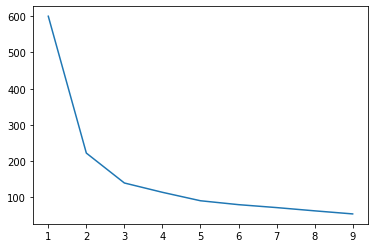

In [54]:
'''
K-평균을 사용한 군집(이어서)
 K-Means++ 알고리즘은 중심 포인트 하나를 먼저 랜덤하게 선택하고 그 다음부터는 이전 중심 포인트와의 거리
를 고려하여 다음 중심 포인트를 선택합니다.
 사이킷런의 KMeans 클래스의 init 매개변수 기본값은 k-means++입니다
 n_init 횟수만큼 반복하여 최상의 결과를 만드는 중심 포인트를 찾습니다. (기본값 10)
 비교하는 기준은 샘플과 클러스터 중심까지의 거리 합(이너셔, inertia_속성에 저장)입니다. 
  (score 메서드에서 반환하는 값)
 샘플 데이터를 각 클러스터까지 거리로 변환하는 transform()를 제공합니다.
'''
print(model.inertia_)
print(model.score(features_std)) #앞에 - 가 붙음 
print(model.transform(new_observation))

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1)
    inertia.append(kmeans.fit(features_std).inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), inertia)
plt.show() 
#반복할수록 중심점과의 거리의 합이 줄어든다(처음 600에서 100밑으로) 

In [55]:
'''
K-평균 군집 속도 향상
 미니배치 k-평균은 랜덤 샘플에 대해서만 수행합니다. (성능을 조금만 희생하고 알고리즘 학습에 드는 시간을 대폭
줄여줍니다.)
 batch_size 매개변수는 각 배치에 랜덤하게 선택할 샘플의 수를 조절합니다
 훈련 세트가 너무 크면 하나의 넘파일 배열로 전달하기 어려우며, 데이터를 조금씩 전달하면서 훈련할 수 있는
partial_fit()를 사용합니다.
 실전에서는 파일 같은 외부 저장소에서 시스템의 메모리가 허용하는만큼 데이터를 추출하여 모델을 훈련합니다
'''

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
iris = datasets.load_iris() # 데이터 로드
features = iris.data
scaler = StandardScaler() # 특성을 표준화
features_std = scaler.fit_transform(features)

cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
model = cluster.fit(features_std) # 모델 훈련

mb_kmeans = MiniBatchKMeans()
for i in range(3):
    mb_kmeans.partial_fit(features_std[i*50:(i+1)*50])

In [56]:
'''
평균이동을 사용한 군집

 사이킷런의 평균 이동 구현인 MeanShift는 클러스터 수나 모양을 가정하지 않고 샘플을 그룹으로 나눌때 사용합
니다
 bandwidth는 샘플이 이동 방향을 결정하기 위해 사용하는 면적(커널)의 반경을 지정합니다.
'''
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

iris = datasets.load_iris() # 데이터 로드
features = iris.data

scaler = StandardScaler() # 특성을 표준화
features_std = scaler.fit_transform(features)
cluster = MeanShift(n_jobs=-1) # meanshift 객체 생성
model = cluster.fit(features_std) # 모델 훈련

print(model.labels_) #몇개의 그룹으로 분류할까
print(model.cluster_centers_) #중심점 2개의 데이터 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 0.50161528 -0.32287436  0.65393539  0.65261739]
 [-1.05954571  0.75811468 -1.2998088  -1.25401594]]


In [58]:
'''
DBSCAN을 사용한 군집
 DBSCAN은 샘플의 밀집 영역을 클러스터로 그룹핑할 수 있습니다.
 eps매개변수 : 다른 샘플을 이웃으로 고려하기 위한 최대 거리
 min_samples : 핵심 샘플로 간주하기 위해 eps 거리 내에 필요한 최소 샘플 개수
 metric : eps에서 사용할 거리 측정 방식
 DBSCAN에서 찾은 핵심 샘플의 인덱스는 core_sample_indices_속성에 저장되어 있습니다.
 훈련 데이터에 대한 예측 결과를 얻으려면 fit_predict()를 사용합니다.
'''
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = datasets.load_iris() # 데이터 로드
features = iris.data
scaler = StandardScaler() # 특성 표준화
features_std = scaler.fit_transform(features)

cluster = DBSCAN(n_jobs=-1) # DBSCAN 객체 생성
model = cluster.fit(features_std) # 모델 훈련
model.labels_ # 클러스터 소속을 확인
print(model.core_sample_indices_)
print(cluster.fit_predict(features_std)) #outlier 제외하고 2개 확인 
    

[  0   1   2   3   4   5   6   7   9  10  11  12  17  19  20  21  23  24
  25  26  27  28  29  30  31  34  35  36  37  38  39  40  42  43  44  45
  46  47  48  49  52  54  55  58  61  63  64  65  66  67  69  71  73  74
  75  77  78  79  80  81  82  83  86  88  89  90  91  92  94  95  96  97
  99 101 103 104 110 111 112 116 120 123 126 133 137 138 139 140 141 142
 143 145 147]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


In [ ]:
'''
계층적 병합을 사용한 군집
 병합 군집(agglometrative clustering)은 강력하고 유연한 계층적 군집 알고리즘입니다.
 병합 군집은 모든 샘플이 각자 하나의 클러스터로 시작합니다. 그 다음 어떤 조건에 부합하는 클러스터들이 서로
병합됩니다.
 이 과정이 어떤 종료 조건에 도달할 때까지 반복되어 클러스터가 커집니다.
 사이킷런의 AgglomerativeClustering 클래스는 linkage 매개변수를 사용하여 병합된 클러스터의 분산(ward) 또는
두 클러스터 샘플 간의 평균 거리(average) 또는 두 클러스터 샘플 간의 최대 거리(complete)를 최소화하는 병합
전략을 결정합니다.
 affinity매개변수는 linkage에서 사용할 거리 측정 방식을 결정합니다. (minkowski, euclidean등)
 n_clusters는 군집 알고리즘이 찾을 클러스터 수를 지정합니다.
 n_clusters개의 클러스터가 남을 때까지 연속적으로 병합됩니다
 labels_속성을 사용해 각 샘플이 속한 클러스터를 확인할 수 있습니다.
 linkage 매개변수에 두 클러스터 샘플 간의 최소 거리를 최소화하는 병합 전략인 single 옵션이 추가되었습니다.
'''

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris() # 데이터 로드
features = iris.data

scaler = StandardScaler() # 특성 표준화
features_std = scaler.fit_transform(features
                                    
cluster = AgglomerativeClustering(n_clusters=3) # 병합 군집 객체 생성
model = cluster.fit(features_std) # 모델 훈련
model.labels_ # 클러스터 소속을 확인
cluster.fit_predict(features_std)